In [2]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
# load model from path
model = tf.saved_model.load(
    r"D://PSG-iTech//faster_rcnn_resnet50_v1_640x640_coco17_tpu-8//faster_rcnn_resnet50_v1_640x640_coco17_tpu-8//saved_model")

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [3]:
def read_label_map(label_map_path):

    item_id = None
    item_name = None
    items = {}
    
    with open(label_map_path, "r") as file:
        for line in file:
            line.replace(" ", "")
            if line == "item{":
                pass
            elif line == "}":
                pass
            elif "id" in line:
                item_id = int(line.split(":", 1)[1].strip())
            elif "display_name" in line:
                item_name = line.split(":", 1)[1].replace("'", "").replace('"', "").strip()

            if item_id is not None and item_name is not None:
                items[item_id] = item_name
                item_id = None
                item_name = None

    return items

In [4]:
class_names = read_label_map(r"D://PSG-iTech//coco_classes.pbtxt")

In [5]:
class_names

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

### Load Image

In [17]:
# read image and preprocess
img = cv2.imread(r"D://PSG-iTech//image.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# get height and width of image
h, w, _ = img.shape

input_tensor = np.expand_dims(img, 0)

# predict from model
resp = model(input_tensor)

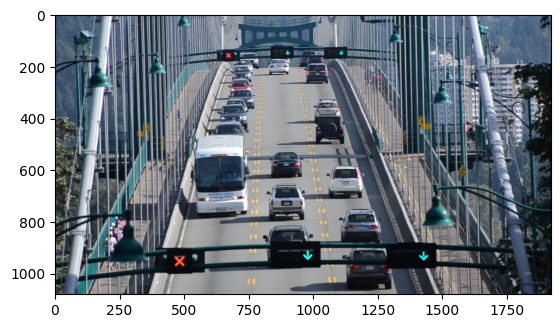

In [18]:
plt.imshow(img)
plt.show()

In [19]:
resp.keys()

dict_keys(['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores'])

In [20]:
resp["detection_boxes"]

<tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
array([[[0.16237171, 0.4264216 , 0.22300118, 0.47471616],
        [0.82740474, 0.58341616, 0.9872287 , 0.68372196],
        [0.60995984, 0.43050298, 0.72820956, 0.50670046],
        ...,
        [0.94975936, 0.47837144, 0.9954454 , 0.6926097 ],
        [0.08206715, 0.20539017, 0.9276725 , 0.72964257],
        [0.38186777, 0.83195114, 0.471189  , 0.8512711 ]]], dtype=float32)>

In [21]:
resp["detection_classes"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  1.,  3.,  8.,  3.,
         8.,  3.,  6.,  3.,  8.,  3., 10.,  3.,  3.,  3.,  3.,  3.,  8.,
         9.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  1., 10., 10.,  3.,
        33.,  1.,  8.,  1.,  3.,  8.,  8.,  8.,  3.,  3., 33.,  7., 10.,
         3.,  1.,  8., 62.,  3.,  6.,  3., 81.,  3.,  8., 62., 10., 62.,
         3.,  3.,  3.,  8.,  8., 62.,  3.,  3.,  8., 10.,  8.,  8., 62.,
        62.,  8.,  9.,  8.,  8.,  3.,  1.,  8.,  3., 10.,  3., 33.,  8.,
        62.,  8.,  3.,  3.,  3., 44.,  8., 85.,  8.,  8.,  3.,  8.,  8.,
         6.,  8.,  6.,  8.,  8.,  3.,  8.,  3.,  9.,  8., 62.,  9., 62.,
         2.,  8.,  9., 62.,  3.,  6., 37.,  6., 33.,  8., 62., 44., 37.,
         8., 10.,  3.,  6.,  6., 62.,  6.,  8., 77., 62., 10.,  7.,  8.,
        15.,  6.,  6.,  8.,  3., 35.,  1.,  3.,  3.,  3., 10., 16., 62.,
        15., 44.,  7.,  3.,  3.,  3., 31.,  1.,  8.,  8.,  8.,  8.,  8.,
 

In [22]:
resp["detection_scores"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[0.965002  , 0.9262607 , 0.9119861 , 0.90666896, 0.8957807 ,
        0.7934422 , 0.68917096, 0.61426497, 0.57680607, 0.493102  ,
        0.41989514, 0.3445532 , 0.3374457 , 0.3265501 , 0.3099072 ,
        0.29746723, 0.2948644 , 0.25242484, 0.22736633, 0.19678588,
        0.19661002, 0.18695058, 0.1771188 , 0.17692356, 0.16885339,
        0.16556376, 0.163879  , 0.16302954, 0.14490409, 0.14299014,
        0.13542408, 0.13173334, 0.12723981, 0.1272041 , 0.12609154,
        0.12341682, 0.11937876, 0.11408421, 0.11270195, 0.1094219 ,
        0.10808668, 0.10612875, 0.10510054, 0.1037674 , 0.09586279,
        0.09528059, 0.094448  , 0.08769657, 0.08031489, 0.08002201,
        0.07992619, 0.07853395, 0.07836535, 0.07762413, 0.07570125,
        0.06687372, 0.06595595, 0.06545422, 0.06268298, 0.0613338 ,
        0.05693066, 0.05514529, 0.05114567, 0.04985781, 0.04619373,
        0.04459636, 0.04368984, 0.04251954, 0.04137318, 0.03644961

In [23]:
resp["detection_classes"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  1.,  3.,  8.,  3.,
         8.,  3.,  6.,  3.,  8.,  3., 10.,  3.,  3.,  3.,  3.,  3.,  8.,
         9.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  1., 10., 10.,  3.,
        33.,  1.,  8.,  1.,  3.,  8.,  8.,  8.,  3.,  3., 33.,  7., 10.,
         3.,  1.,  8., 62.,  3.,  6.,  3., 81.,  3.,  8., 62., 10., 62.,
         3.,  3.,  3.,  8.,  8., 62.,  3.,  3.,  8., 10.,  8.,  8., 62.,
        62.,  8.,  9.,  8.,  8.,  3.,  1.,  8.,  3., 10.,  3., 33.,  8.,
        62.,  8.,  3.,  3.,  3., 44.,  8., 85.,  8.,  8.,  3.,  8.,  8.,
         6.,  8.,  6.,  8.,  8.,  3.,  8.,  3.,  9.,  8., 62.,  9., 62.,
         2.,  8.,  9., 62.,  3.,  6., 37.,  6., 33.,  8., 62., 44., 37.,
         8., 10.,  3.,  6.,  6., 62.,  6.,  8., 77., 62., 10.,  7.,  8.,
        15.,  6.,  6.,  8.,  3., 35.,  1.,  3.,  3.,  3., 10., 16., 62.,
        15., 44.,  7.,  3.,  3.,  3., 31.,  1.,  8.,  8.,  8.,  8.,  8.,
 

In [24]:
# iterate over boxes, class_index and score list
for boxes, classes, scores in zip(resp['detection_boxes'].numpy(), resp['detection_classes'].numpy().astype(int), resp['detection_scores'].numpy()):
    for box, cls, score in zip(boxes, classes, scores): # iterate over sub values in list
        if score > 0.5: # we are using only detection with confidence of over 0.8
            ymin = int(box[0] * h)
            xmin = int(box[1] * w)
            ymax = int(box[2] * h)
            xmax = int(box[3] * w)
            # write classname for bounding box
            cv2.putText(img, class_names[cls], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            # draw on image
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (128, 0, 128), 1)

# convert back to bgr and save image
cv2.imwrite("output.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

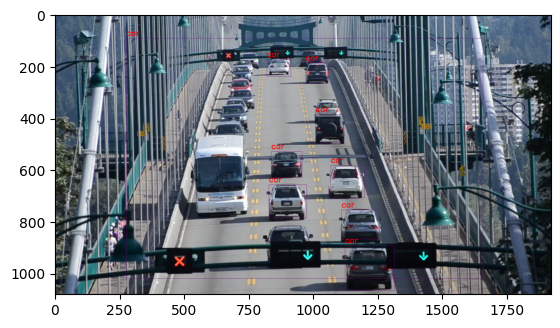

In [25]:
plt.imshow(img)
plt.show()